In [1]:
import numpy as np
import pandas as pd

In [2]:
# getting data into dataframe
df_diagnosis = pd.read_excel('../Data/Diagnoseakkuratheit.xlsx')
df_s1 = pd.read_csv('../Data/S1a_Data_EDAs.csv')

## Knowing data: df_diagnosis => containing loesung points

In [3]:
df_diagnosis.shape

(530, 10)

In [4]:
df_diagnosis.describe()

,loesung_pkt,bgrd_pkt,dd_pkt,steps_pkt
count,530.000000,528.000000,528.000000,530.000000
mean,-8.503774,-21.975379,-5.255682,-7.271698
std,28.913975,36.630176,22.624083,28.324106
min,-99.000000,-99.000000,-99.000000,-99.000000
25%,0.000000,-66.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,0.000000,2.000000
max,1.000000,8.000000,2.000000,5.000000


In [5]:
df_diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PIN          530 non-null    object 
 1   Loesung_Ant  479 non-null    object 
 2   loesung_pkt  530 non-null    float64
 3   bgrd_ant     488 non-null    object 
 4   bgrd_pkt     528 non-null    float64
 5   DD_Ant       451 non-null    object 
 6   dd_pkt       528 non-null    float64
 7   steps_ant    484 non-null    object 
 8   steps_pkt    530 non-null    int64  
 9   Fall         530 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 41.5+ KB


In [6]:
# no duplicates found
df_diagnosis[df_diagnosis.duplicated()]

,PIN,Loesung_Ant,loesung_pkt,bgrd_ant,bgrd_pkt,DD_Ant,dd_pkt,steps_ant,steps_pkt,Fall


In [7]:
df_diagnosis.head(2)

,PIN,Loesung_Ant,loesung_pkt,bgrd_ant,bgrd_pkt,DD_Ant,dd_pkt,steps_ant,steps_pkt,Fall
0,AEOGCR7,"Pneumonie, Apirationspneumonie",1.0,körperliche Untersuchung: Lunge mit grobblasig...,4.0,"Carcinom, Bronchialkarzinom - Kleinzelliges Ka...",0.0,"Antibiotika-Therapie, Fiebersenkung, Schmerzth...",1,Goettlich
1,AKVVO8S,"Pneumonie, Apirationspneumonie",1.0,Hinweise in der Amnamnese bei Zn Stroke und Dy...,5.0,"Herzinsuffizienz,Lungenödem,Pneumonie, bakteriell",0.0,"Maßnahmen > Patientin auf Intensiv, Vorsicht v...",3,Goettlich


In [8]:
# changing the column names for better understanding
df_diagnosis.rename(columns={'Loesung_Ant':'Solution',
                             'loesung_pkt': 'Solution_points',
                             'Fall':'case_assigned_to' }, inplace = True)

In [9]:
df_diagnosis.columns

Index(['PIN', 'Solution', 'Solution_points', 'bgrd_ant', 'bgrd_pkt', 'DD_Ant',
       'dd_pkt', 'steps_ant', 'steps_pkt', 'case_assigned_to'],
      dtype='object')

In [10]:
##### 106 unique PIN found
df_diagnosis['PIN'].nunique()

106

In [11]:
# 20 percent unique cases => less data
df_diagnosis['PIN'].nunique()/530*100

20.0

<div class="alert alert-warning">
<b> 20 percent unique cases => less data</b>
</div>

In [12]:
# 5 steps for each PIN ------------------------------what does PIN tell?
df_diagnosis['PIN'].value_counts()

L4MJVOU    5
FKA4M44    5
0T7A1UK    5
K3P4Z3T    5
8NPH959    5
          ..
UBMC6CN    5
B5MKCBD    5
NDA4BJM    5
J8GECST    5
SU0AIG8    5
Name: PIN, Length: 106, dtype: int64

In [13]:
# 5 doctors data
df_diagnosis['case_assigned_to'].unique()

array(['Goettlich', 'Freundorf', 'Binder', 'Wenninger', 'Schenker'],
      dtype=object)

In [14]:
# evenly distributed data among Doctors/diagnoser
df_diagnosis['case_assigned_to'].value_counts()

Wenninger    106
Binder       106
Schenker     106
Goettlich    106
Freundorf    106
Name: case_assigned_to, dtype: int64

In [15]:
df_diagnosis['Solution_points'].unique()

# 0 => wrong
# 1 => correct
# -99 => missing
# 0.5 => partially correct

array([  1. ,   0.5, -99. ,   0. ])

In [16]:
df_diagnosis['Solution_points'].value_counts()

 1.0     318
 0.0     111
 0.5      52
-99.0     49
Name: Solution_points, dtype: int64

<div class="alert alert-warning">
<b>------------ 49 missig values ---------EDA</b>
</div>

## Knowing data: df_s1 => containing EDA

In [17]:
df_s1.head()

,PIN,timestamp,case_name,ref_name,data,EDA
0,04D91VS,2018-05-28 14:38:30.0,Goettlich,Vorstellung der Patientin,NaN,iEE
1,04D91VS,2018-05-28 14:38:51.0,Goettlich,Rettungsdienstprotokoll,NaN,iEE
2,04D91VS,2018-05-28 14:39:22.0,Goettlich,Anamnese,NaN,iEE
3,04D91VS,2018-05-28 14:39:33.0,Goettlich,Vorerkrankungen,NaN,iEE
4,04D91VS,2018-05-28 14:40:45.0,Goettlich,Körperliche Untersuchung,NaN,iEE


In [18]:
df_s1.shape

(38740, 6)

In [19]:
df_s1.describe()

,PIN,timestamp,case_name,ref_name,data,EDA
count,38740,38740,38738,38740,29876,26154
unique,103,31612,5,25,3221,5
top,FJM4N3C,2018-05-28 07:49:06.0,Schenker,1. Anforderungsschein,bt_status0_submit,cEE
freq,820,7,10817,15613,1570,13458


In [20]:
df_s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38740 entries, 0 to 38739
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PIN        38740 non-null  object
 1   timestamp  38740 non-null  object
 2   case_name  38738 non-null  object
 3   ref_name   38740 non-null  object
 4   data       29876 non-null  object
 5   EDA        26154 non-null  object
dtypes: object(6)
memory usage: 1.8+ MB


In [21]:
## changing column names for better understanding
df_s1.columns

Index(['PIN', 'timestamp', 'case_name', 'ref_name', 'data', 'EDA'], dtype='object')

In [22]:
df_s1.rename(columns={'ref_name':'prev_reference',
                             'data': 'doc_remark',
                             'case_name':'case_assigned_to' }, inplace = True)

In [23]:
df_s1.columns

Index(['PIN', 'timestamp', 'case_assigned_to', 'prev_reference', 'doc_remark',
       'EDA'],
      dtype='object')

In [24]:
###### 103 unique PIN found

df_s1['PIN'].nunique()

103

<div class="alert alert-warning">
<b>df_diagnosis = 106 and df_s1 = 103; PIN ---------mismatch</b>
</div>

In [25]:
# cases assigned to doc
df_s1['case_assigned_to'].value_counts()

Schenker     10817
Binder        9261
Freundorf     7590
Wenninger     6336
Goettlich     4734
Name: case_assigned_to, dtype: int64

<div class="alert alert-warning">
<b>Uneven distribution of cases</b>
</div>

In [26]:
# types of EDA - epistemic data analysis
df_s1['EDA'].unique()

array(['iEE', 'EG', 'cEE', 'cHG', nan, 'DC'], dtype=object)

<div class="alert alert-block alert-info">
<h4>Knowing about epistemic data</h4>
<li> iEE = Individual evidence elicitation </li>
<li> EG = Evidence Generation </li>
<li> cEE = Evidence evaluation </li>
<li> CHG = Hypothesis Generation</li>
<li> nan = </li>
<li> DC = Drawing conclusion </li>
</li>
</div>

In [27]:
### Exploring EDA
df_s1['EDA'].value_counts()

cEE    13458
iEE     5956
cHG     3189
EG      2908
DC       643
Name: EDA, dtype: int64

In [28]:
## percentage of each type of analysis 
df_s1['EDA'].value_counts()/df_s1['EDA'].count()

cEE    0.514568
iEE    0.227728
cHG    0.121932
EG     0.111188
DC     0.024585
Name: EDA, dtype: float64

<div class="alert alert-warning">
<b> 51 percent evidence evaluation </b><br>
<b> 2percent conclusions </b>
</div>

In [29]:
### empty or notKnown values
df_s1.isna().sum() 

PIN                     0
timestamp               0
case_assigned_to        2
prev_reference          0
doc_remark           8864
EDA                 12586
dtype: int64

In [30]:
df_s1.isna().sum() / df_s1.count()

PIN                 0.000000
timestamp           0.000000
case_assigned_to    0.000052
prev_reference      0.000000
doc_remark          0.296693
EDA                 0.481227
dtype: float64

In [31]:
df_s1['EDA'].count()

26154

<div class="alert alert-warning">
<b> 48 percent EDA = missing ----------table s1 </b><br>
</div>

In [32]:
df_s1['doc_remark'].nunique() / df_s1['doc_remark'].count()

0.10781229080198153

In [33]:
### 10 percent repeated remarks

## Cleaning dfs


### 1. df_diagnosis

In [34]:
## df_diagnosis
df_diagnosis_clean = df_diagnosis[['PIN', 'Solution_points', 'case_assigned_to']].copy()

In [35]:
df_diagnosis_clean.shape

(530, 3)

In [36]:
df_diagnosis_clean.head()

,PIN,Solution_points,case_assigned_to
0,AEOGCR7,1.0,Goettlich
1,AKVVO8S,1.0,Goettlich
2,A75J1OO,1.0,Goettlich
3,BPDREJD,1.0,Goettlich
4,BQLTZM2,0.5,Goettlich


In [37]:
df_diagnosis_clean.isna().sum()

PIN                 0
Solution_points     0
case_assigned_to    0
dtype: int64

### 2. df_s1

In [38]:
df_s1.count()

PIN                 38740
timestamp           38740
case_assigned_to    38738
prev_reference      38740
doc_remark          29876
EDA                 26154
dtype: int64

In [39]:
df_s1_clean = df_s1[['PIN','timestamp', 'case_assigned_to','EDA']].copy()

In [40]:
df_s1_clean.head()

,PIN,timestamp,case_assigned_to,EDA
0,04D91VS,2018-05-28 14:38:30.0,Goettlich,iEE
1,04D91VS,2018-05-28 14:38:51.0,Goettlich,iEE
2,04D91VS,2018-05-28 14:39:22.0,Goettlich,iEE
3,04D91VS,2018-05-28 14:39:33.0,Goettlich,iEE
4,04D91VS,2018-05-28 14:40:45.0,Goettlich,iEE


In [41]:
df_s1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38740 entries, 0 to 38739
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PIN               38740 non-null  object
 1   timestamp         38740 non-null  object
 2   case_assigned_to  38738 non-null  object
 3   EDA               26154 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [42]:
df_s1_clean[df_s1_clean['case_assigned_to'].isna()]

,PIN,timestamp,case_assigned_to,EDA
7321,3FERR59,2018-05-17 12:14:02.0,NaN,NaN
7322,3FERR59,2018-05-17 12:14:03.0,NaN,NaN


In [43]:
## removing these un_assigned cases -------------- no EDA found
del_indexes = df_s1_clean[df_s1_clean['case_assigned_to'].isna()].index
df_s1_clean.drop(del_indexes, inplace = True)

In [44]:
df_s1_clean[df_s1_clean['case_assigned_to'].isna()]

,PIN,timestamp,case_assigned_to,EDA


In [45]:
del_indexes = df_diagnosis_clean[df_diagnosis_clean['PIN'] == '3FERR59'].index

In [46]:
## removing these un_assigned cases -------------- PIN from df_diagnosis -------
df_diagnosis_clean.drop(del_indexes, inplace = True)

In [47]:
df_diagnosis_clean[df_diagnosis_clean['PIN'] == '3FERR59']

,PIN,Solution_points,case_assigned_to


In [48]:
df_s1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38738 entries, 0 to 38739
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PIN               38738 non-null  object
 1   timestamp         38738 non-null  object
 2   case_assigned_to  38738 non-null  object
 3   EDA               26154 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [49]:
df_s1_clean['EDA'].value_counts()

cEE    13458
iEE     5956
cHG     3189
EG      2908
DC       643
Name: EDA, dtype: int64

In [50]:
#### FIlling NaN in EDA with 'None'
df_s1_clean.fillna(value = 'none',inplace = True)
df_s1_clean['EDA'].value_counts()

cEE     13458
none    12584
iEE      5956
cHG      3189
EG       2908
DC        643
Name: EDA, dtype: int64

In [51]:
df_s1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38738 entries, 0 to 38739
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PIN               38738 non-null  object
 1   timestamp         38738 non-null  object
 2   case_assigned_to  38738 non-null  object
 3   EDA               38738 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [52]:
df_s1_clean.head()

,PIN,timestamp,case_assigned_to,EDA
0,04D91VS,2018-05-28 14:38:30.0,Goettlich,iEE
1,04D91VS,2018-05-28 14:38:51.0,Goettlich,iEE
2,04D91VS,2018-05-28 14:39:22.0,Goettlich,iEE
3,04D91VS,2018-05-28 14:39:33.0,Goettlich,iEE
4,04D91VS,2018-05-28 14:40:45.0,Goettlich,iEE


In [53]:
# convert the timestamp to 'datetime' data type

df_s1_clean['timestamp'] = pd.to_datetime(df_s1_clean['timestamp'], 
               infer_datetime_format= True, errors = 'coerce' )

In [54]:
df_s1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38738 entries, 0 to 38739
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PIN               38738 non-null  object        
 1   timestamp         38738 non-null  datetime64[ns]
 2   case_assigned_to  38738 non-null  object        
 3   EDA               38738 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.5+ MB


In [55]:
# Grouping data by 'assigned to' and 'PIN' which acts like a primary key to both the tables

In [56]:
s1_PIN_case = df_s1_clean.groupby(['PIN','case_assigned_to'])

In [57]:
PIN_not_found = []
for x,y in s1_PIN_case:
#     print(x,len(y))
    z = df_diagnosis_clean[df_diagnosis_clean['PIN'] == x[0]].any()
    if not z[0]:
        PIN_not_found.append(x[0]) 
        print("not found:",x[0])

not found: 3FERR59
not found: 3FERR59
not found: 3FERR59
not found: 3FERR59
not found: 3FERR59
not found: E6C42R7
not found: E6C42R7
not found: E6C42R7
not found: E6C42R7
not found: EJSIQ0T
not found: EJSIQ0T
not found: N5SJM59
not found: juliahalu@gmail.com
not found: l.brandl@campus.lmu.de
not found: l.brandl@campus.lmu.de
not found: l.brandl@campus.lmu.de
not found: l.brandl@campus.lmu.de
not found: l.brandl@campus.lmu.de


In [58]:
# any prediction for these 'PIN' are not available
PIN_not_found

['3FERR59',
 '3FERR59',
 '3FERR59',
 '3FERR59',
 '3FERR59',
 'E6C42R7',
 'E6C42R7',
 'E6C42R7',
 'E6C42R7',
 'EJSIQ0T',
 'EJSIQ0T',
 'N5SJM59',
 'juliahalu@gmail.com',
 'l.brandl@campus.lmu.de',
 'l.brandl@campus.lmu.de',
 'l.brandl@campus.lmu.de',
 'l.brandl@campus.lmu.de',
 'l.brandl@campus.lmu.de']

In [59]:
## checking in df_s1 data
df_s1_clean[df_s1_clean['PIN'] == 'l.brandl@campus.lmu.de']

,PIN,timestamp,case_assigned_to,EDA
25297,l.brandl@campus.lmu.de,2018-05-04 09:00:22,Goettlich,iEE
25298,l.brandl@campus.lmu.de,2018-05-04 09:00:30,Goettlich,iEE
25299,l.brandl@campus.lmu.de,2018-05-04 09:00:35,Goettlich,iEE
25300,l.brandl@campus.lmu.de,2018-05-04 09:00:37,Goettlich,iEE
25301,l.brandl@campus.lmu.de,2018-05-04 09:00:43,Goettlich,iEE
...,...,...,...,...
25496,l.brandl@campus.lmu.de,2018-05-07 09:46:43,Binder,iEE
25497,l.brandl@campus.lmu.de,2018-09-11 07:38:41,Goettlich,none
25498,l.brandl@campus.lmu.de,2018-09-11 07:38:42,Goettlich,iEE
25499,l.brandl@campus.lmu.de,2018-09-11 07:38:44,Goettlich,iEE


In [60]:
df_diagnosis_clean[df_diagnosis_clean['PIN'] == 'l.brandl@campus.lmu.de']

,PIN,Solution_points,case_assigned_to


In [61]:
#### removing these PIN from df_s1 because no information on their correctness available

In [62]:
for x in PIN_not_found:
        df_s1_clean = df_s1_clean.loc[(df_s1_clean['PIN'] != x)]

In [63]:
### checking of still any unlinked PIN exists

In [64]:
s1_PIN_case = df_s1_clean.groupby(['PIN','case_assigned_to'])
PIN_not_found = []
for x,y in s1_PIN_case:
#     print(x,len(y))
    z = df_diagnosis_clean[df_diagnosis_clean['PIN'] == x[0]].any()
    if not z[0]:
        PIN_not_found.append(x[0]) 
        print("not found:",x[0])

In [65]:
df_s1_clean.shape

(38207, 4)

In [66]:
df_diagnosis_clean.sample(5)

,PIN,Solution_points,case_assigned_to
398,RGISDAO,0.0,Schenker
292,JN5IT6O,1.0,Wenninger
448,KPF56GK,1.0,Goettlich
401,SSQT0V1,0.0,Schenker
30,L4MJVOU,1.0,Goettlich


### Visualizing the diagnosis Dataset

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# copy the dataframe 
df_diagnosis_viz = df_diagnosis_clean.copy()

In [69]:
# Converting 0.5 to 0 -> solution points and removing -99
df_diagnosis_viz['Solution_points'].replace({0.5: 0}, inplace = True)

# dropping values that have solution points = -99 => missing
df_diagnosis_viz.drop(df_diagnosis_viz.loc[df_diagnosis_viz['Solution_points']==-99].index, inplace=True)

In [70]:
df_diagnosis_viz.head()

,PIN,Solution_points,case_assigned_to
0,AEOGCR7,1.0,Goettlich
1,AKVVO8S,1.0,Goettlich
2,A75J1OO,1.0,Goettlich
3,BPDREJD,1.0,Goettlich
4,BQLTZM2,0.0,Goettlich


In [71]:
# names = df_diagnosis_viz.case_assigned_to.unique().tolist()

# vals = [1, 2, 3, 4, 5]
# x = dict(zip(names, vals))


# df_diagnosis_viz.replace(x, inplace = True)

In [72]:
# df_diagnosis_viz.head(5)

In [73]:
a = df_diagnosis_viz.groupby(["case_assigned_to","Solution_points"]).count()
df_merged_wide = a.unstack()
df_merged_wide.head()

PIN    
Solution_points  0.0 1.0
case_assigned_to        
Binder            59  35
Freundorf          7  85
Goettlich         15  84
Schenker          75  18
Wenninger          5  93

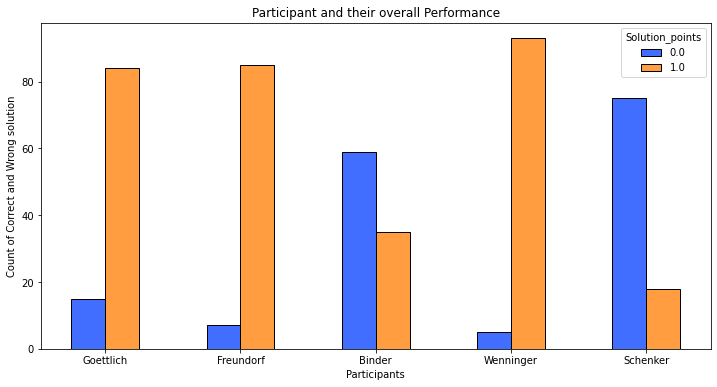

In [74]:
a4_dims = (12, 6)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.histplot(x = 'case_assigned_to', data = df_diagnosis_viz , multiple='dodge',
             hue='Solution_points', palette="bright", shrink=.5 )
ax.set(xlabel='Participants', ylabel='Count of Correct and Wrong solution', title = 'Participant and their overall Performance')

plt.show()

## Merging both the datasets

In [75]:
df_merged = pd.merge(df_diagnosis_clean, df_s1_clean,how='inner', 
                     left_on=('PIN','case_assigned_to'), right_on=('PIN','case_assigned_to'))

In [76]:
df_merged.shape

(38207, 5)

In [77]:
df_merged.head()

,PIN,Solution_points,case_assigned_to,timestamp,EDA
0,AEOGCR7,1.0,Goettlich,2018-05-08 15:12:22,iEE
1,AEOGCR7,1.0,Goettlich,2018-05-08 15:12:26,iEE
2,AEOGCR7,1.0,Goettlich,2018-05-08 15:12:52,iEE
3,AEOGCR7,1.0,Goettlich,2018-05-08 15:13:50,iEE
4,AEOGCR7,1.0,Goettlich,2018-05-08 15:14:05,iEE


In [78]:
df_merged.Solution_points.value_counts()

 1.0     20943
 0.0     11140
 0.5      4411
-99.0     1713
Name: Solution_points, dtype: int64

## Cleaning the merged dataset

### 1. Creating new data frame with EDA categories as numbers

Knowing about epistemic data
- none = 0
- iEE = Problem Identification - 1
- EG = Evidence Generation - 2
- cEE = Evidence evaluation - 3
- CHG = Hypothesis Generation - 4
- DC = Drawing conclusion - 5

In [79]:
# copy the dataframe merged
df_merged_onehot = df_merged.copy()

In [80]:
df_merged_onehot["EDA"].replace({"iEE": 1, "EG": 2, "cEE": 3, "cHG": 4, "DC": 5, "none": 0}, inplace=True)

In [81]:
df_merged_onehot.head()

,PIN,Solution_points,case_assigned_to,timestamp,EDA
0,AEOGCR7,1.0,Goettlich,2018-05-08 15:12:22,1
1,AEOGCR7,1.0,Goettlich,2018-05-08 15:12:26,1
2,AEOGCR7,1.0,Goettlich,2018-05-08 15:12:52,1
3,AEOGCR7,1.0,Goettlich,2018-05-08 15:13:50,1
4,AEOGCR7,1.0,Goettlich,2018-05-08 15:14:05,1


### 2. Converting 0.5 to 0 -> solution points and removing -99

In [82]:
df_merged_onehot['Solution_points'].value_counts()

 1.0     20943
 0.0     11140
 0.5      4411
-99.0     1713
Name: Solution_points, dtype: int64

In [83]:
df_merged_onehot['Solution_points'].replace({0.5: 0}, inplace = True)

In [84]:
# dropping values that have solution points = -99 => missing
df_merged_onehot.drop(df_merged_onehot.loc[df_merged_onehot['Solution_points']==-99].index, inplace=True)

In [85]:
df_merged_onehot['Solution_points'].value_counts()

1.0    20943
0.0    15551
Name: Solution_points, dtype: int64

In [86]:
df_merged_onehot.head()

,PIN,Solution_points,case_assigned_to,timestamp,EDA
0,AEOGCR7,1.0,Goettlich,2018-05-08 15:12:22,1
1,AEOGCR7,1.0,Goettlich,2018-05-08 15:12:26,1
2,AEOGCR7,1.0,Goettlich,2018-05-08 15:12:52,1
3,AEOGCR7,1.0,Goettlich,2018-05-08 15:13:50,1
4,AEOGCR7,1.0,Goettlich,2018-05-08 15:14:05,1


### Exploring the merged data

In [87]:
# Number of EDA Steps taken by each participant for their task

In [88]:
a = df_merged_onehot.groupby(["PIN","case_assigned_to"])["EDA"].count()
df_merged_wide = a.unstack()
df_merged_wide.sample(10)

case_assigned_to,Binder,Freundorf,Goettlich,Schenker,Wenninger
PIN,,,,,
PMFO45G,85.0,NaN,NaN,106.0,45.0
4I4EI1O,108.0,78.0,32.0,88.0,43.0
5TA0CLM,93.0,76.0,38.0,31.0,33.0
QQ27TIK,69.0,58.0,37.0,227.0,37.0
72J00IC,96.0,52.0,69.0,52.0,45.0
KHR9QVF,80.0,70.0,43.0,69.0,59.0
BPDREJD,98.0,82.0,52.0,94.0,42.0
L4MJVOU,95.0,64.0,42.0,137.0,57.0
DA0UGI1,222.0,88.0,57.0,NaN,113.0


In [89]:
# almost equal number of cases assigned to each of the participants
df_merged_wide.count()

case_assigned_to
Binder       93
Freundorf    91
Goettlich    94
Schenker     91
Wenninger    96
dtype: int64

## Visualizing

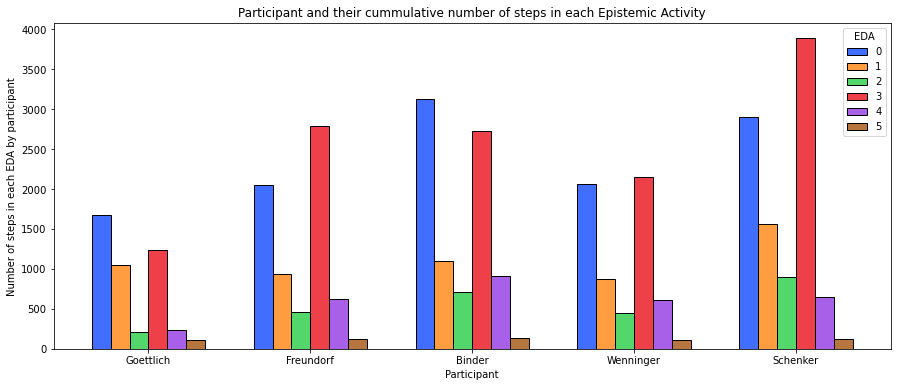

In [90]:
# Participants and their cummulative number of steps in each Epistemic Activity

a4_dims = (15, 6)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.histplot(x = 'case_assigned_to', data = df_merged_onehot , multiple='dodge',
             hue='EDA', palette="bright", shrink=0.7 )
ax.set(xlabel='Participant', ylabel='Number of steps in each EDA by participant', title = 'Participant and their cummulative number of steps in each Epistemic Activity')

plt.show()

### Exploring the worst and the best Participants in terms of their performance

In [91]:
good_participant = ["Goettlich","Freundorf","Wenninger"]
poor_participant = ["Binder","Schenker"]

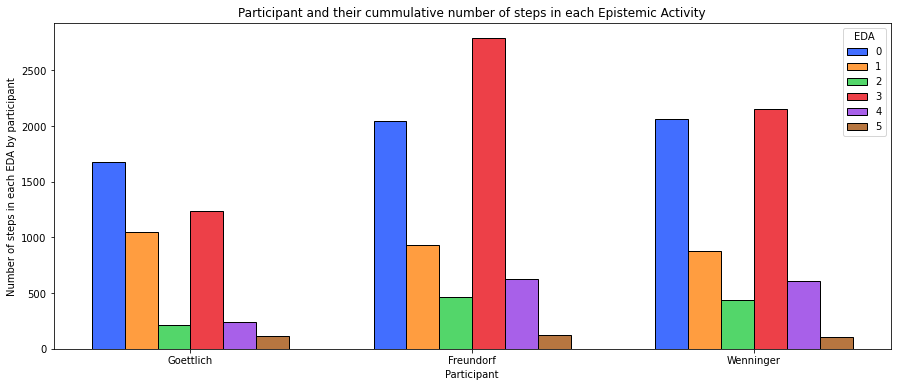

In [92]:
# Visualizinf the epistemic activities of the participants having good performance
dims = (15, 6)
fig, ax = plt.subplots(figsize=dims)

ax = sns.histplot(x = 'case_assigned_to', data = df_merged_onehot[df_merged_onehot["case_assigned_to"].isin(good_participant)] , multiple='dodge',
             hue='EDA', palette="bright", shrink=0.7 )
ax.set(xlabel='Participant', ylabel='Number of steps in each EDA by participant', title = 'Participant and their cummulative number of steps in each Epistemic Activity')

plt.show()

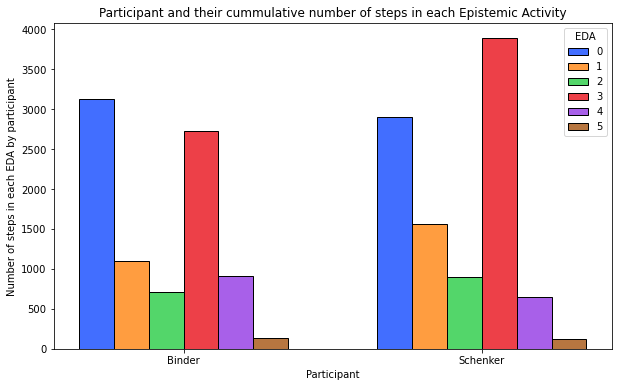

In [93]:
# Visualizinf the epistemic activities of the participants having poor performance
dims = (10, 6)
fig, ax = plt.subplots(figsize=dims)

ax = sns.histplot(x = 'case_assigned_to', data = df_merged_onehot[df_merged_onehot["case_assigned_to"].isin(poor_participant)] , multiple='dodge',
             hue='EDA', palette="bright", shrink=0.7, common_norm = True )
ax.set(xlabel='Participant', ylabel='Number of steps in each EDA by participant', title = 'Participant and their cummulative number of steps in each Epistemic Activity')

plt.show()

In [94]:
# df_goettlich = df_merged[(df_merged.case_assigned_to == 'Goettlich')]

In [95]:
# df_goettlich['Solution_points'].value_counts()/df_goettlich['Solution_points'].count()*100

In [96]:
# sns.histplot(x = 'EDA', data = df_goettlich , multiple='dodge',
#              hue='Solution_points', hue_norm=(-1,1), palette='rainbow')
# plt.show()


In [97]:
# sns.barplot(wrong.index,wrong, data = (wrong), palette='viridis')
# sns.barplot(correct.index,correct, data = (correct), palette='rainbow')
# plt.xticks(
#     rotation=45, 
#     horizontalalignment='right',
#     fontweight='light',
#     fontsize='x-large'  
# )
# plt.show()


### Visualize Based on Solution points

#### Giving column 'case_assigned_to' labels

In [98]:
names = df_merged_onehot.case_assigned_to.unique().tolist()

vals = [1, 2, 3, 4, 5]
x = dict(zip(names, vals))


df_merged_onehot.replace(x, inplace = True)


In [99]:
# Labels for each name
x

{'Goettlich': 1, 'Freundorf': 2, 'Binder': 3, 'Wenninger': 4, 'Schenker': 5}

In [100]:
df_merged_onehot.sample(5)

,PIN,Solution_points,case_assigned_to,timestamp,EDA
7883,UBMC6CN,1.0,2,2018-05-16 11:15:54,4
22608,3CNLQ1T,1.0,4,2018-05-17 15:38:28,0
16938,36ZUJ33,1.0,3,2018-05-18 12:27:56,3
9669,4I4EI1O,1.0,2,2018-05-30 11:19:01,4
16526,27KVB2O,1.0,3,2018-05-28 08:13:49,3


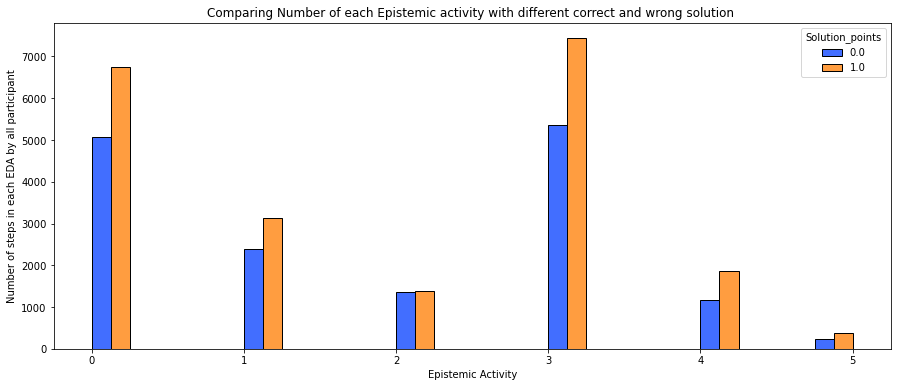

In [101]:
# Comparing Number of each Epistemic activity with different correct and wrong solution 

a4_dims = (15, 6)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.histplot(x = 'EDA', data = df_merged_onehot , multiple='dodge',
             hue='Solution_points', palette="bright", binwidth = 0.25)
ax.set(xlabel='Epistemic Activity', ylabel='Number of steps in each EDA by all participant', title = 'Comparing Number of each Epistemic activity with different correct and wrong solution ')

plt.show()

### Exploring the timestamp

In [102]:
df_merged_onehot['diff_timestamp'] = df_merged_onehot.groupby(['PIN', 'case_assigned_to'])['timestamp'].transform(pd.Series.diff).fillna(pd.Timedelta(seconds=0))

In [103]:
df_merged_onehot['diff_seconds']  = df_merged_onehot['diff_timestamp'].apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')

In [104]:
# df_merged_onehot.drop(['diff_timestamp', 'timestamp'], axis = 1, inplace = True)

In [105]:
df_merged_onehot.head()

,PIN,Solution_points,case_assigned_to,timestamp,EDA,diff_timestamp,diff_seconds
0,AEOGCR7,1.0,1,2018-05-08 15:12:22,1,0 days 00:00:00,0
1,AEOGCR7,1.0,1,2018-05-08 15:12:26,1,0 days 00:00:04,4
2,AEOGCR7,1.0,1,2018-05-08 15:12:52,1,0 days 00:00:26,26
3,AEOGCR7,1.0,1,2018-05-08 15:13:50,1,0 days 00:00:58,58
4,AEOGCR7,1.0,1,2018-05-08 15:14:05,1,0 days 00:00:15,15


In [106]:
df_merged_onehot[df_merged_onehot['diff_seconds'] > 5000]

,PIN,Solution_points,case_assigned_to,timestamp,EDA,diff_timestamp,diff_seconds
35516,1RN9U3A,0.0,3,2018-08-25 09:56:19,0,9 days 21:18:33,854313
38022,1RN9U3A,0.0,5,2018-08-25 09:57:03,0,9 days 21:04:28,853468


In [107]:
# dropping the outliers
df_merged_onehot.drop(index = [35516,38022], inplace = True)

In [108]:
df_merged_onehot[df_merged_onehot['diff_seconds'] > 5000]

,PIN,Solution_points,case_assigned_to,timestamp,EDA,diff_timestamp,diff_seconds


In [109]:
df_merged_time = df_merged_onehot.groupby(['case_assigned_to','Solution_points'], as_index=False)["diff_seconds"].sum() 

In [110]:
df_merged_time.head()

,case_assigned_to,Solution_points,diff_seconds
0,1,0.0,12594
1,1,1.0,71786
2,2,0.0,5109
3,2,1.0,78148
4,3,0.0,62511


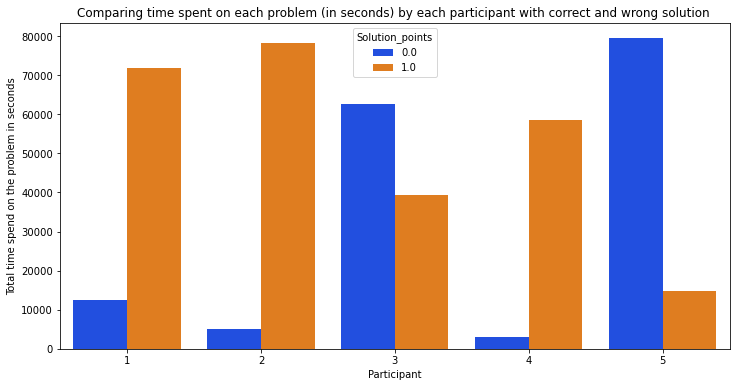

In [111]:
# Comparing time spent on each problem (in seconds) by each participant with correct and wrong solution 

a4_dims = (12, 6)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.barplot(x = 'case_assigned_to', y = "diff_seconds", data = df_merged_time , dodge=True,
             hue='Solution_points', palette="bright")
ax.set(xlabel='Participant', ylabel='Total time spend on the problem in seconds', title = 'Comparing time spent on each problem (in seconds) by each participant with correct and wrong solution ')

plt.show()

In [112]:
df_merged_time_mean = df_merged_onehot.groupby(['case_assigned_to','Solution_points'], as_index=False)["diff_seconds"].mean() 

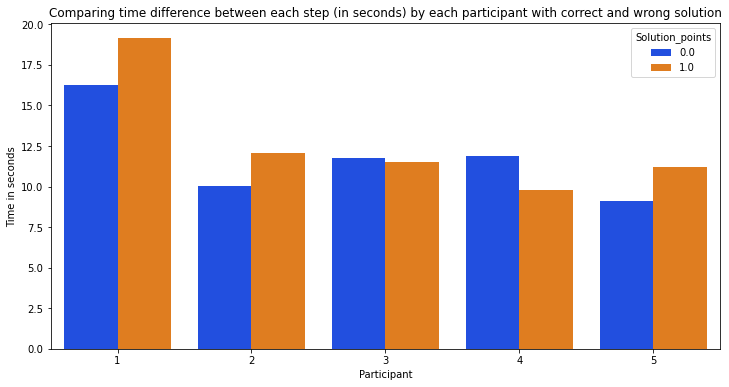

In [113]:
# Comparing time difference between each step (in seconds) by each participant with correct and wrong solution'

a4_dims = (12, 6)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.barplot(x = 'case_assigned_to', y = "diff_seconds", data = df_merged_time_mean , dodge=True,
             hue='Solution_points', palette="bright")
ax.set(xlabel='Participant', ylabel='Time in seconds', title='Comparing time difference between each step (in seconds) by each participant with correct and wrong solution')

plt.show()

In [115]:
start_time = df_merged_onehot.groupby(['PIN','case_assigned_to'], sort = False)['timestamp'].head(1).tolist()

In [117]:
stop_time = df_merged_onehot.groupby(['PIN','case_assigned_to'],  sort = False)['timestamp'].tail(1).tolist()

In [120]:
new_df = pd.DataFrame(df_merged_onehot.groupby(['PIN','case_assigned_to'],  sort = False).size().reset_index())
new_df.drop(0,1, inplace = True)
new_df.head()

,PIN,case_assigned_to
0,AEOGCR7,1
1,AKVVO8S,1
2,A75J1OO,1
3,BPDREJD,1
4,BQLTZM2,1


In [121]:
new_df['start_time'] = start_time
new_df['stop_time'] = stop_time
new_df['time_spent'] = new_df['stop_time'] - new_df['start_time']

In [126]:
new_df['result'] = df_merged_onehot.groupby(['PIN','case_assigned_to'], sort = False)['Solution_points'].min().tolist()

In [124]:
new_df['timespent_seconds'] = new_df['time_spent'].apply(lambda x: x/np.timedelta64(1, 's')).fillna(0).astype('int64')

,PIN,case_assigned_to,start_time,stop_time,time_spent,timespent_seconds
0,AEOGCR7,1,2018-05-08 15:12:22,2018-05-08 15:32:43,0 days 00:20:21,1221
1,AKVVO8S,1,2018-05-09 07:01:14,2018-05-09 07:23:59,0 days 00:22:45,1365
2,A75J1OO,1,2018-05-11 07:12:33,2018-05-11 07:38:08,0 days 00:25:35,1535
3,BPDREJD,1,2018-05-11 14:56:22,2018-05-11 15:10:34,0 days 00:14:12,852
4,BQLTZM2,1,2018-05-11 11:00:58,2018-05-11 11:19:16,0 days 00:18:18,1098


In [127]:
new_df.head()

,PIN,case_assigned_to,start_time,stop_time,time_spent,timespent_seconds,result
0,AEOGCR7,1,2018-05-08 15:12:22,2018-05-08 15:32:43,0 days 00:20:21,1221,1.0
1,AKVVO8S,1,2018-05-09 07:01:14,2018-05-09 07:23:59,0 days 00:22:45,1365,1.0
2,A75J1OO,1,2018-05-11 07:12:33,2018-05-11 07:38:08,0 days 00:25:35,1535,1.0
3,BPDREJD,1,2018-05-11 14:56:22,2018-05-11 15:10:34,0 days 00:14:12,852,1.0
4,BQLTZM2,1,2018-05-11 11:00:58,2018-05-11 11:19:16,0 days 00:18:18,1098,0.0


In [134]:
new_df[new_df['timespent_seconds'] > 3000]

,PIN,case_assigned_to,start_time,stop_time,time_spent,timespent_seconds,result
428,1RN9U3A,3,2018-08-15 12:27:20,2018-08-25 09:56:40,9 days 21:29:20,854960,0.0


In [135]:
new_df.drop(index = 428, inplace = True)

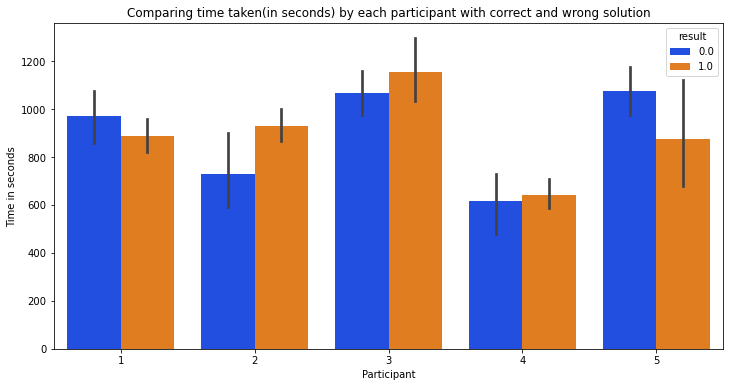

In [137]:
# Comparing time difference between each step (in seconds) by each participant with correct and wrong solution'

a4_dims = (12, 6)
fig, ax = plt.subplots(figsize=a4_dims)

ax = sns.barplot(x = 'case_assigned_to', y = "timespent_seconds", data = new_df , dodge=True,
             hue='result', palette="bright")
ax.set(xlabel='Participant', ylabel='Time in seconds', title='Comparing time taken(in seconds) by each participant with correct and wrong solution')

plt.show()

### Findings till now
1. About participants
    - Geottlich r: 80, p: 10 w: -------avg
    - Freundorf r: 86, p: 2  w:4 ------avg
    - Binder r: 58, p: 0 w:37 ---------- poor
    - Wenninger r: 95, p: 3 w:0 -------best
    - Schenker r: 12, p: 33 w:47 ----------------worst
       
    
2. Every participant has a way of approaching problem and the right and wrong outcome only slightly differs from each other
3. Exploring the timestamp data reveals
    - if participant knows the solution it takes precise steps - takes less time to reach the conclusion
    - CEE is generally more when the participant is confused 
    - if participant doesnt know the solution it takes steps which are not defined under the EDA

**Understood the about epistemic activities and labelled them**
- iEE = Problem Identification - 1
- EG = Evidence Generation - 2
- cEE = Evidence evaluation - 3
- CHG = - Hypothesis Generation - 4
- DC = Drawing conclusion - 5
- none = - 0

In [ ]:
# determining the name of the file
file_name = 'Merged_onehot_new.xlsx'
  
# saving the excel
df_merged_onehot.to_excel(file_name)